In [82]:
import os
import pandas as pd

In [83]:
# Cambiar directorio
os.chdir("/home/jam/Proyect/laboratorio-machine-learning/")

In [84]:
print(os.getcwd())

/home/jam/Proyect/laboratorio-machine-learning


In [85]:
# Cargar los datos que tenemos disponibles
data = pd.read_csv("data/raw/churn.csv")


In [86]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [87]:
# Nos deshacemos de las columnas que no contribuyen en mucho
df_proc = data.drop(data.columns[0:3], axis=1)

In [88]:
df_proc 

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [89]:
# Convertimos en numérico los datos de formato categorico, para más info: shorturl.at/y0269
column_equivalence = {}
features = list(df_proc .columns)
for i, column in enumerate(list([str(d) for d in df_proc.dtypes])):
    if column == "object":
        df_proc[df_proc.columns[i]] = df_proc[df_proc.columns[i]].fillna(df_proc[df_proc.columns[i]].mode())
        categorical_column = df_proc[df_proc.columns[i]].astype("category")
        current_column_equivalence = dict(enumerate(categorical_column.cat.categories))
        column_equivalence[i] = dict((v,k) for k,v in current_column_equivalence.items())
        df_proc[df_proc.columns[i]] = categorical_column.cat.codes
    else:
        df_proc[df_proc.columns[i]] = df_proc[df_proc.columns[i]].fillna(df_proc[df_proc.columns[i]].median())

In [90]:
column_equivalence

{1: {'France': 0, 'Germany': 1, 'Spain': 2}, 2: {'Female': 0, 'Male': 1}}

In [104]:
df_proc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int8   
 2   Gender           10000 non-null  int8   
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), int8(2)
memory usage: 722.8 KB


In [91]:
df_proc

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,96270.64,0
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0
9997,709,0,0,36,7,0.00,1,0,1,42085.58,1
9998,772,1,1,42,3,75075.31,2,1,0,92888.52,1


In [105]:
df_proc.isnull().sum() # mira los valores de nulos de cada columna y cuenta cuantos hay por columna

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [108]:
# Análisis de correlación entre variables
import matplotlib.pyplot as plt

<Axes: >

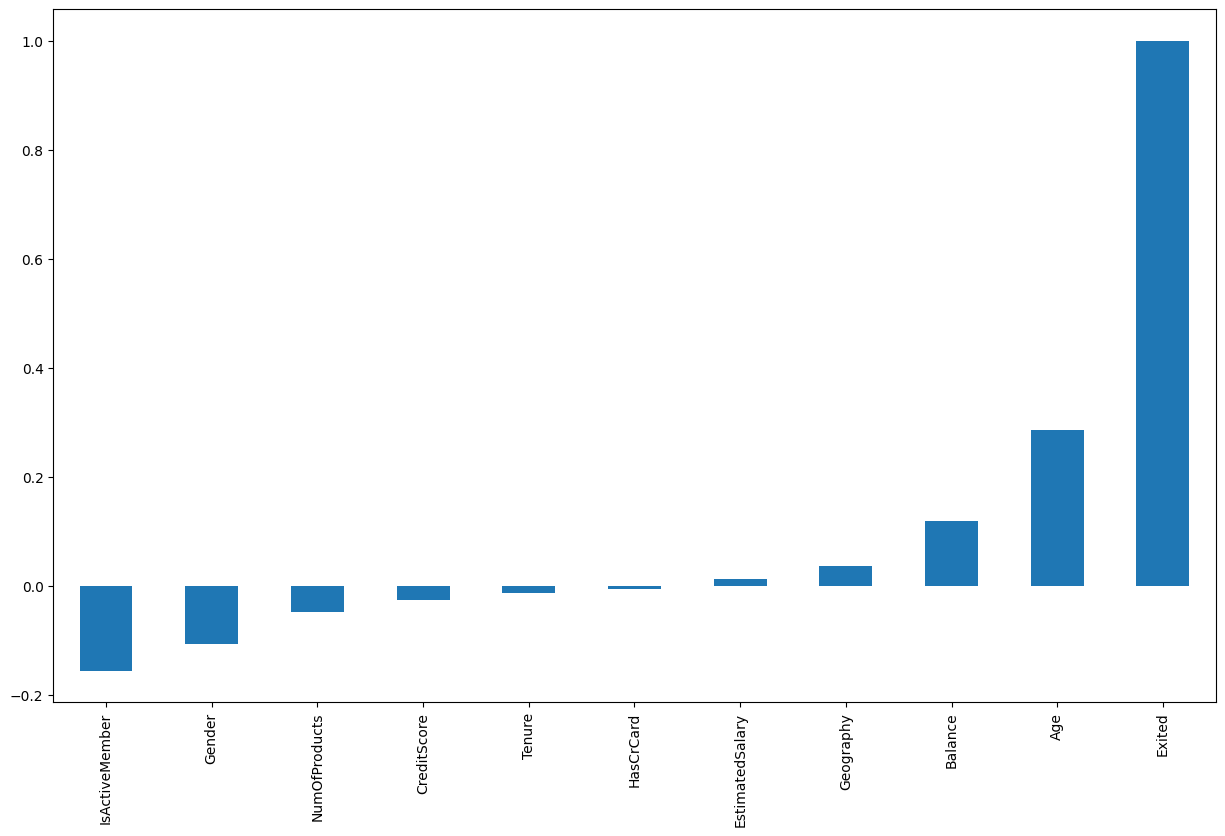

In [110]:
# miramos la correlación entre variable objetivo Churn y las demás variables
# graficamos solamente la variable Churn,

fig = plt.figure(figsize=(15,9))
df_proc.corr()['Exited'].sort_values(ascending=True).plot(kind='bar')

- En la gráfica la mayor correlación de 1, la más alta porque es la correlación con si misma.
- La segunda mayor correlación es entre Exited y Age.
- Exited no tiene casi correlación con HashCard, Tenure, EstimatedSalary, CreditScore.
- No se envidencia problema de multicolineadlidad.
- Seguimos trabajando con el df tal cual como está.

## Vamos a escalar los datos
Para que sea mucho más fácil para el algoritmo entender como manejarlos.

In [112]:
from sklearn.preprocessing import MinMaxScaler #importamos método de escalamiento

In [114]:
scaler = MinMaxScaler() #Definnimos función scaler para que tenga método de escalamiento
df_proc_scaled = scaler.fit_transform(df_proc)

df_proc_scaled #El resultado arroja un array, un tensor

array([[0.538     , 0.        , 0.        , ..., 1.        , 0.50673489,
        1.        ],
       [0.516     , 1.        , 0.        , ..., 1.        , 0.56270874,
        0.        ],
       [0.304     , 0.        , 0.        , ..., 0.        , 0.56965435,
        1.        ],
       ...,
       [0.718     , 0.        , 0.        , ..., 1.        , 0.21039009,
        1.        ],
       [0.844     , 0.5       , 1.        , ..., 0.        , 0.46442905,
        1.        ],
       [0.884     , 0.        , 0.        , ..., 0.        , 0.19091423,
        0.        ]])

In [116]:
df_proc_scaled = pd.DataFrame(df_proc_scaled) # convertimos a dataframe
df_proc_scaled # el resultado arroja que se perideron los nombres de las columnas o variables

,0,1,2,3,4,5,6,7,8,9,10
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


In [118]:
df_proc_scaled.columns = df_proc.columns # asginamos nuevamente nombre a columnas que tenía df_proc_scaled
df_proc_scaled

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735,1.0
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709,0.0
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654,1.0
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120,0.0
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9995,0.842,0.0,1.0,0.283784,0.5,0.000000,0.333333,1.0,0.0,0.481341,0.0
9996,0.332,0.0,1.0,0.229730,1.0,0.228657,0.000000,1.0,1.0,0.508490,0.0
9997,0.718,0.0,0.0,0.243243,0.7,0.000000,0.000000,0.0,1.0,0.210390,1.0
9998,0.844,0.5,1.0,0.324324,0.3,0.299226,0.333333,1.0,0.0,0.464429,1.0


In [128]:
# Vamos a crear un modelo de regresion logistica
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


In [129]:
# Generar los datos para poder separar la variable de respuesta de los datos que tenemos disponibles
# La bariable target es Exited
X = df_proc_scaled.drop(['Exited'], axis=1)
y = df_proc_scaled['Exited'].values

In [130]:
X.head(5)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,1.0,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,1.0,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [131]:
y

array([1., 0., 1., ..., 1., 1., 0.])

In [132]:
# Separar los datos en datos de entrenamiento y testing
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

In [133]:
# Crear el modelo y entrenarlo
clf_lin =  LogisticRegression().fit(X_train, y_train)
y_pred = clf_lin.predict(X_test)


In [136]:
# Medir los resultados obtenidos
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[2591,   66],
       [ 540,  103]])

In [137]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, y_pred))

0.8163636363636364


In [138]:
# Generar el binario del modelo para reutilizarlo, equivalencia de variables categoricas y caracteristicas del modelo
import pickle
pickle.dump(clf_lin, open("models/model.pk", "wb"))
pickle.dump(column_equivalence, open("data/interim/column_equivalence.pk", "wb"))
pickle.dump(features, open("data/interim/features.pk", "wb"))